In [1]:
import sys
sys.path.insert(1, '..')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ProdSeqAnalysis_utils import *
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams["font.family"] = "Arial"
from matplotlib.ticker import StrMethodFormatter
from matplotlib.lines import Line2D

In [2]:
TazDMSO_signalpath = "/path/to/HEK293T_output.PPIEnrichment.tsv"
TazDMSO_signals_unorder, TazDMSO_nms_unorder, TazDMSO_pairnms = ReadProdTSVFile(TazDMSO_signalpath)

reorder_idx = [5, 4, 1, 0, 7, 6, 3, 2]
TazDMSO_nms = [TazDMSO_nms_unorder[x] for x in reorder_idx]
TazDMSO_signals_normed = []
TazDMSO_signals = []
for idx in reorder_idx:
    curr_row = TazDMSO_signals_unorder[idx]
    TazDMSO_signals_normed.append([x / curr_row[49] for x in curr_row])
    TazDMSO_signals.append(curr_row)


TazDMSO_signals_normed_avg = []
TazDMSO_nms_avg = []
for row_idx in [0, 2, 4, 6]:
    curr_row = []
    for col_idx in range(len(TazDMSO_signals_normed[row_idx])):
        curr_row.append((TazDMSO_signals_normed[row_idx][col_idx] + TazDMSO_signals_normed[row_idx + 1][col_idx]) / 2)
    TazDMSO_signals_normed_avg.append(curr_row)
    TazDMSO_nms_avg.append(TazDMSO_nms[row_idx][0 : -2])

In [3]:
TazDMSO_nms

['HEK_DMSO_B2T2',
 'HEK_DMSO_B2T1',
 'HEK_DMSO_B1T2',
 'HEK_DMSO_B1T1',
 'HEK_Taz_B2T2',
 'HEK_Taz_B2T1',
 'HEK_Taz_B1T2',
 'HEK_Taz_B1T1']

In [4]:
collapse_rep_signals = [[], []]

for idx in range(len(TazDMSO_signals[0])):
    collapse_rep_signals[0].append(np.mean([x[idx] for x in TazDMSO_signals[0:4]]))
    collapse_rep_signals[1].append(np.mean([x[idx] for x in TazDMSO_signals[4:8]]))

collapse_rep_squares = [
    np.zeros((11, 11)),
    np.zeros((11, 11))
]

row_idx = 0
for i in range(11):
    for j in range(i + 1, 11):
        (collapse_rep_squares[0])[i][j] = (collapse_rep_signals[0])[row_idx]
        (collapse_rep_squares[0])[j][i] = (collapse_rep_signals[0])[row_idx]
        (collapse_rep_squares[1])[i][j] = (collapse_rep_signals[1])[row_idx]
        (collapse_rep_squares[1])[j][i] = (collapse_rep_signals[1])[row_idx]
        row_idx += 1

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

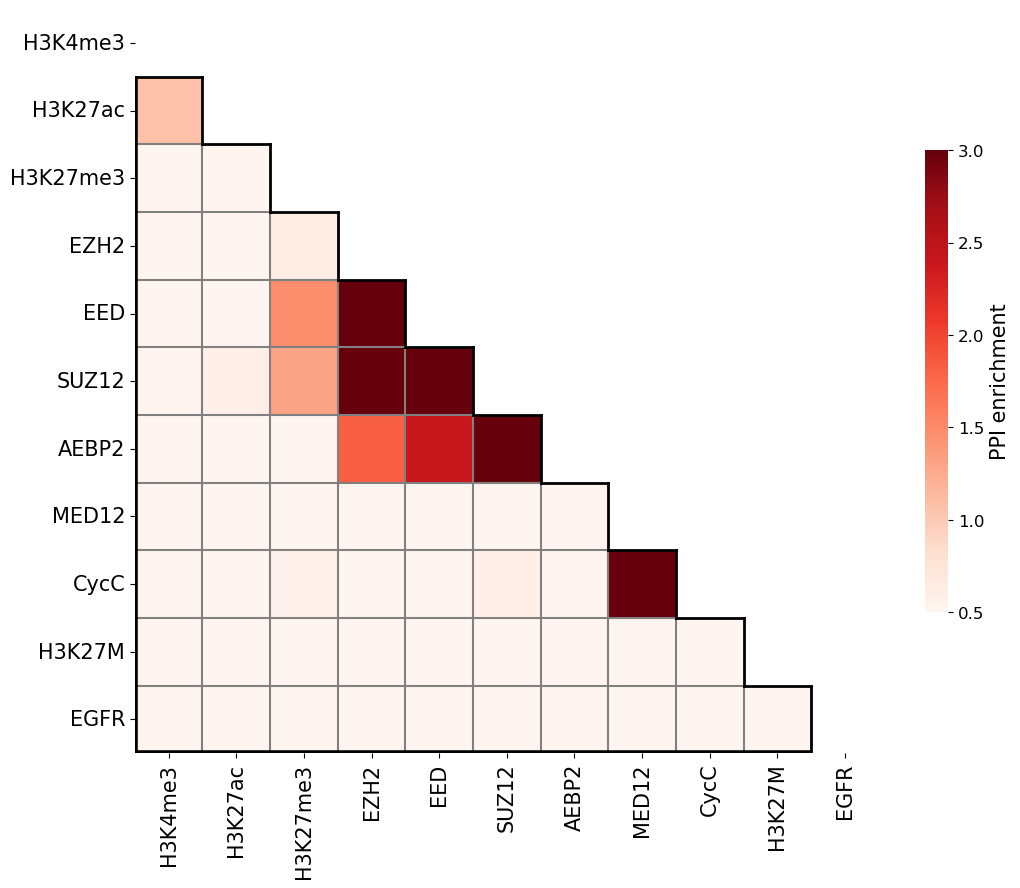

In [5]:
ticklabels = ["H3K4me3", "H3K27ac", "H3K27me3", "EZH2", "EED", "SUZ12", "AEBP2", "MED12", "CycC", "H3K27M", "EGFR"]
mask = np.zeros_like(collapse_rep_squares[0], dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = True
fig, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(collapse_rep_squares[0], mask=mask, cmap="Reds", vmax = 3, vmin = .5,
        square=True, cbar_kws={"shrink": .5, },
        yticklabels = ticklabels, xticklabels = ticklabels, ax = ax)

for idx in range(1, 11):
    ax.plot([idx, idx], [idx + 1, 11], color = "grey", lw = 1.5)
    ax.plot([0, idx - 1], [idx, idx], color = "grey", lw = 1.5)
    ax.plot([idx - 1, idx], [idx, idx], color = "black", lw = 2)
    ax.plot([idx, idx], [idx, idx + 1], color = "black", lw = 2)

ax.plot([0, 0], [1.04, 11], color = "black", lw = 4)
ax.plot([0, 9.96], [11, 11], color = "black", lw = 4)
ax.tick_params(axis='both', labelsize=15)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize = 12)
cbar.set_label('PPI enrichment', size = 15)

# fig.savefig("TazDMSO_colorbar.svg", dpi = 1200)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

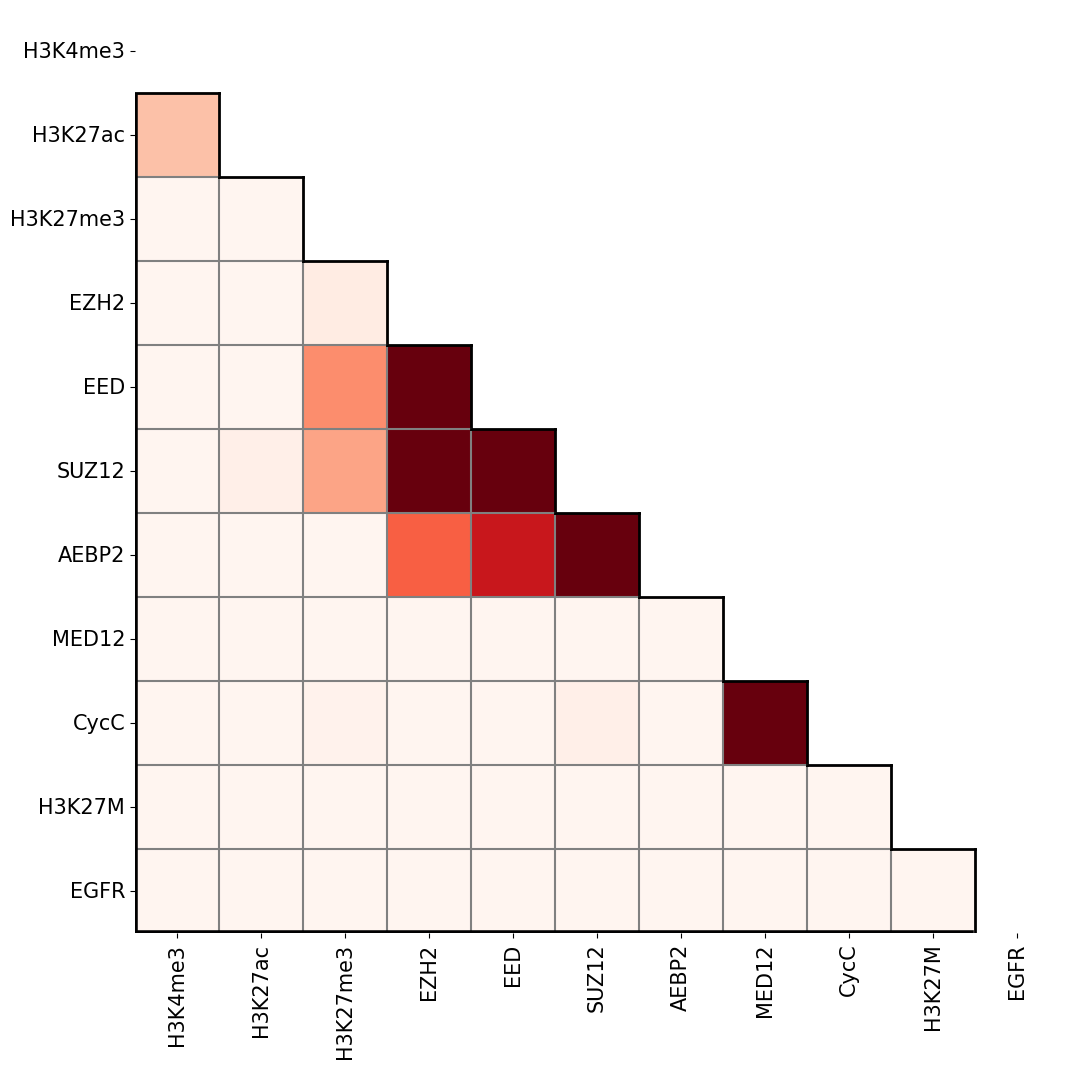

In [6]:
ticklabels = ["H3K4me3", "H3K27ac", "H3K27me3", "EZH2", "EED", "SUZ12", "AEBP2", "MED12", "CycC", "H3K27M", "EGFR"]
mask = np.zeros_like(collapse_rep_squares[0], dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = True
fig, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(collapse_rep_squares[0], mask=mask, cmap="Reds", vmax = 3, vmin = .5,
        square=True, cbar_kws={"shrink": .5, },
        yticklabels = ticklabels, xticklabels = ticklabels, ax = ax, cbar = False)

for idx in range(1, 11):
    ax.plot([idx, idx], [idx + 1, 11], color = "grey", lw = 1.5)
    ax.plot([0, idx - 1], [idx, idx], color = "grey", lw = 1.5)
    ax.plot([idx - 1, idx], [idx, idx], color = "black", lw = 2)
    ax.plot([idx, idx], [idx, idx + 1], color = "black", lw = 2)

ax.plot([0, 0], [1.04, 11], color = "black", lw = 4)
ax.plot([0, 9.96], [11, 11], color = "black", lw = 4)
ax.tick_params(axis='both', labelsize=15)
ax.tick_params(axis='x', rotation = 90)
ax.tick_params(axis='y', rotation = 0)

# fig.savefig("TazDMSO_lowerleft.svg", dpi = 1200)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

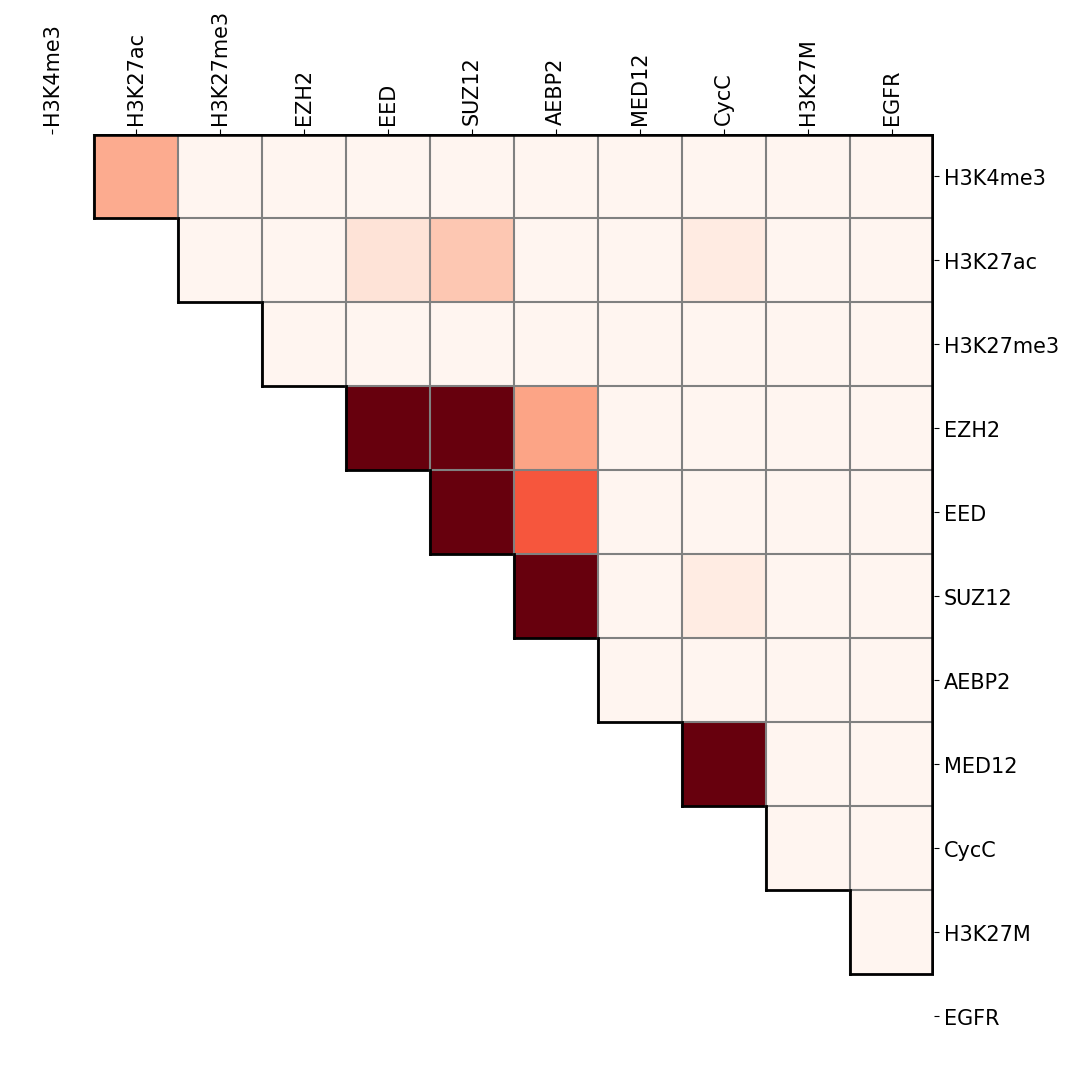

In [7]:
mask = np.zeros_like(collapse_rep_squares[0], dtype=np.bool)
mask[np.tril_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = True
fig, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(collapse_rep_squares[1], mask=mask, cmap="Reds", vmax = 3, vmin = .5,
        square=True, cbar_kws={"shrink": .5, "orientation": "horizontal"},
        yticklabels = ticklabels, xticklabels = ticklabels, ax = ax, cbar = False)

for idx in range(1, 11):
    ax.plot([idx, idx], [0, idx], color = "grey", lw = 1.5)
    ax.plot([idx, 11], [idx - 1, idx - 1], color = "grey", lw = 1.5)
    ax.plot([idx, idx + 1], [idx, idx], color = "black", lw = 2)
    ax.plot([idx, idx], [idx - 1, idx], color = "black", lw = 2)

ax.plot([11, 11], [0, 9.96], color = "black", lw = 4)
ax.plot([1.04, 11], [0, 0], color = "black", lw = 4)

ax.tick_params(axis='both', labelsize=15)
ax.tick_params(axis='x', rotation = 90)
ax.tick_params(axis='y', rotation = 0)
ax.xaxis.tick_top()
ax.yaxis.tick_right()

# fig.savefig("TazDMSO_upperright.svg", dpi = 1200)

In [8]:
plot_cmaps = [
    sns.color_palette("YlOrBr", as_cmap = True),
    sns.color_palette("Purples", as_cmap = True),
    sns.color_palette("Greens", as_cmap = True),
    sns.color_palette("Blues", as_cmap = True),
]

PPI_plot_groups = [
    ["EED&EZH2", "EED&SUZ12", "EZH2&SUZ12"],
    ["AEBP2&EED", "AEBP2&EZH2", "AEBP2&SUZ12"],
    ["H3K27me3&EED", "H3K27me3&EZH2", "H3K27me3&SUZ12"],
    ["H3K27ac&EED", "H3K27ac&EZH2", "H3K27ac&SUZ12"],
]


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

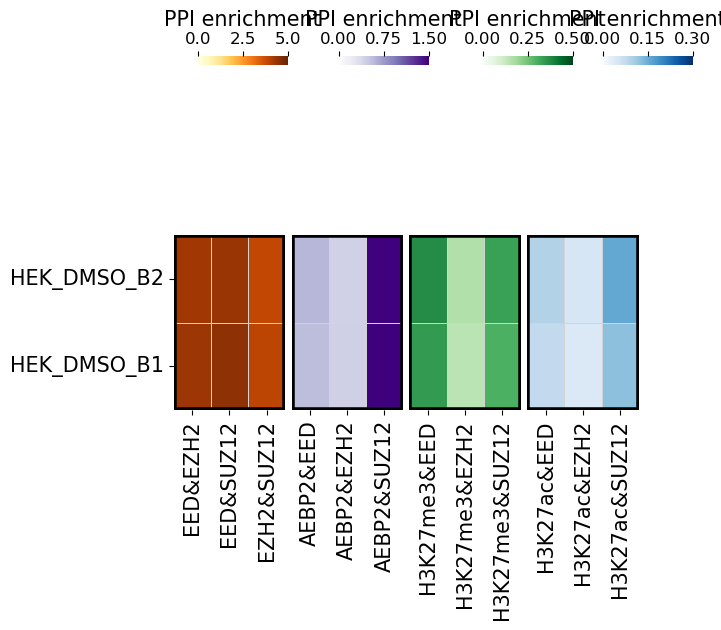

In [9]:
fig = GroupedPPIHeatmap(TazDMSO_signals_normed_avg[0:2], TazDMSO_nms_avg[0:2], TazDMSO_pairnms, bc_pair_groups = PPI_plot_groups,
                  plot_cmaps = plot_cmaps,
                  sample_group_sizes = [2, 2], plot_vmax = [5, 1.5, 0.5, 0.3],
                    plot_vmin = [0, 0, 0, 0],
                  cbar_ax_locs = [
                      [0.165, 0.8, 0.15, 0.018],
                      [0.4, 0.8, 0.15, 0.018],
                      [0.64, 0.8, 0.15, 0.018],
                      [0.84, 0.8, 0.15, 0.018],
                  ],
                  plot_size = (6, 5)
                 )
# fig.savefig("TazDMSO_heatmap_tophalf.svg", dpi = 1200)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

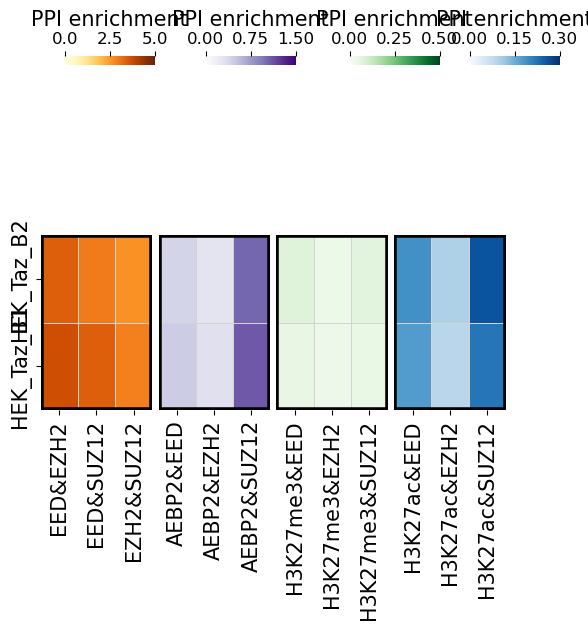

In [10]:
fig = GroupedPPIHeatmap(TazDMSO_signals_normed_avg[2:4], TazDMSO_nms_avg[2:4], TazDMSO_pairnms, bc_pair_groups = PPI_plot_groups,
                  plot_cmaps = plot_cmaps,
                  sample_group_sizes = [2, 2], plot_vmax = [5, 1.5, 0.5, 0.3],
                    plot_vmin = [0, 0, 0, 0],
                  cbar_ax_locs = [
                      [0.165, 0.8, 0.15, 0.018],
                      [0.4, 0.8, 0.15, 0.018],
                      [0.64, 0.8, 0.15, 0.018],
                      [0.84, 0.8, 0.15, 0.018],
                  ],
                  plot_size = (6, 5)
                 )
# fig.savefig("TazDMSO_heatmap_bottomhalf.svg", dpi = 1200)

In [11]:
from scipy.stats import mannwhitneyu

def GroupedPPIBoxPlot(PPI_signals, condition_nms, condition_idxs, PPI_pairnms, bc_pair_groups, plot_vmax,
                      plot_size = (12, 6),
                      plot_vmin = [],
                      ):
    def set_box_color(bp, color):
        plt.setp(bp['boxes'], color=color)
        plt.setp(bp['whiskers'], color=color)
        plt.setp(bp['caps'], color=color)
        plt.setp(bp['medians'], color=color)
        
    if len(plot_vmin) == 0:
        plot_vmin = [0 for x in range(len(plot_vmax))]
        
    signal_dict = [{} for x in range(len(PPI_signals))]
    for k in range(len(PPI_signals)):
        for i in range(len(PPI_pairnms)):
            (signal_dict[k])[PPI_pairnms[i]] = (PPI_signals[k])[i]
            pairnm_split = (PPI_pairnms[i]).split("&")
            pairnm_rev = pairnm_split[1] + "&" + pairnm_split[0]
            (signal_dict[k])[pairnm_rev] = (PPI_signals[k])[i]

    if (len(plot_vmax) == 0):
        plot_vmax = [None for x in range(len(bc_pair_groups))]

    if (len(plot_vmin) == 0):
        plot_vmin = [None for x in range(len(bc_pair_groups))]
        
    fig, axes = plt.subplots(figsize = plot_size, ncols = len(bc_pair_groups),
                            gridspec_kw={'width_ratios': [len(x) for x in bc_pair_groups]})
    fig.subplots_adjust(wspace = 0.35)

    logratio_nms = []
    logratio_vals = []
    for i in range(len(bc_pair_groups)):
        curr_pairs = bc_pair_groups[i]
        data_a = []
        data_b = []
        manU_res = []
        curr_max = []
        for pair in curr_pairs:

            pop_a = [signal_dict[k][pair] for k in condition_idxs[0]]
            pop_b = [signal_dict[k][pair] for k in condition_idxs[1]]

            data_a.append(pop_a)
            data_b.append(pop_b)
            curr_max.append(max(max(pop_a), max(pop_b)))
            manU_res.append(mannwhitneyu(pop_a, pop_b)[1])

            logratio_nms.append(pair)
            logratio_vals.append(np.log2(np.mean([signal_dict[k][pair] + 1 for k in condition_idxs[0]]) / np.mean([signal_dict[k][pair] + 1 for k in condition_idxs[1]])))
        curr_ax = axes[i]
        
        ticks = bc_pair_groups[i]
        positions = [np.array(np.arange(len(data_a)))*2.0-0.35, np.array(np.arange(len(data_b)))*2.0+0.35]

        bpl = curr_ax.boxplot(data_a, positions = positions[0], sym='', widths=0.5, boxprops={'linewidth': 2},
                              medianprops={'linewidth': 1.5},
                              whiskerprops={'linewidth': 1.5},
                              capprops={'linewidth': 1.5})
        
        bpr = curr_ax.boxplot(data_b, positions = positions[1], sym='', widths=0.5, boxprops={'linewidth': 2},
                              medianprops={'linewidth': 1.5},
                              whiskerprops={'linewidth': 1.5},
                              capprops={'linewidth': 1.5})

        
        
        set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
        set_box_color(bpr, '#2C7BB6')

        bar_height = plot_vmax[i] / 100
        bar_offset = -plot_vmax[i] / 15
        for pval_idx in range(len(positions[0])):
            
            curr_ax.plot([positions[0][pval_idx], positions[0][pval_idx]],
                         [curr_max[pval_idx] - bar_offset - bar_height, curr_max[pval_idx] - bar_offset], color = "black")
            curr_ax.plot([positions[1][pval_idx], positions[1][pval_idx]],
                         [curr_max[pval_idx] - bar_offset - bar_height, curr_max[pval_idx] - bar_offset], color = "black")
            curr_ax.plot([positions[0][pval_idx], positions[1][pval_idx]],
                         [curr_max[pval_idx] - bar_offset, curr_max[pval_idx] - bar_offset], color = "black")
            curr_manU = manU_res[pval_idx]
            if curr_manU < 0.001:
                sig_symbol = '***'
            elif curr_manU < 0.01:
                sig_symbol = '**'
            elif curr_manU < 0.05:
                sig_symbol = '*'
            else:
                sig_symbol = "ns"
                
            curr_ax.text((positions[0][pval_idx] + positions[1][pval_idx]) * 0.5,
                         curr_max[pval_idx] - bar_offset, sig_symbol, ha='center', va='bottom', c='k',
                         fontsize = 12, rotation = 90)
        
        curr_ax.set_xticks(np.arange(0, len(ticks) * 2, 2), ticks)
        curr_ax.axis(ymin=plot_vmin[i], ymax=plot_vmax[i])
        curr_ax.set_xticklabels(curr_ax.get_xticklabels(), ha='center', rotation=90, fontsize = 12) 
        # curr_ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
        curr_ax.tick_params(axis='y', labelsize = 10, rotation = 90)
        curr_ax.yaxis.tick_right()
        for split_line_idx in range(1, 2 * len(data_a) - 2, 2):
            curr_ax.plot([split_line_idx, split_line_idx], [plot_vmin[i], plot_vmax[i]], color = "lightgrey")
        if (i == len(bc_pair_groups) - 1):
            curr_ax.plot([], c='#D7191C', label=condition_nms[0])
            curr_ax.plot([], c='#2C7BB6', label=condition_nms[1])
            handles, labels = curr_ax.get_legend_handles_labels()
            add_point = Line2D([0], [0], label="Replicate 1's technical replicates", marker='^', markersize=10, 
                           markerfacecolor='dimgrey', linestyle='', markeredgecolor='dimgrey')
            add_point_2 = Line2D([0], [0], label="Replicate 2's technical replicates", marker='o', markersize=10, 
                           markerfacecolor='dimgrey', linestyle='', markeredgecolor='dimgrey')
            handles.extend([add_point, add_point_2])
            curr_ax.legend(handles=handles, loc = "upper right", framealpha=1.0, fontsize = 9)
            
            
        
        if (i == 0):
            curr_ax.set_ylabel("PPI Enrichment", fontsize = 15)

        manual_jitter = [-0.05, 0.05, -0.09, 0.1]
        for box_idx in range(len(data_a)):
            for jit_idx in [0, 1]:
                curr_ax.scatter([positions[0][box_idx] + manual_jitter[jit_idx]], data_a[box_idx][jit_idx], color = 'dimgrey',
                           alpha = 1, s = 20, zorder=10, marker = "^")
                curr_ax.scatter([positions[1][box_idx] + manual_jitter[jit_idx]], data_b[box_idx][jit_idx], color = 'dimgrey',
                           alpha = 1, s = 20, zorder=10, marker = "^")
            for jit_idx in [2, 3]:
                curr_ax.scatter([positions[0][box_idx] + manual_jitter[jit_idx]], data_a[box_idx][jit_idx], color = 'dimgrey',
                           alpha = 1, s = 20, zorder=10, marker = "o")
                curr_ax.scatter([positions[1][box_idx] + manual_jitter[jit_idx]], data_b[box_idx][jit_idx], color = 'dimgrey',
                           alpha = 1, s = 20, zorder=10, marker = "o")

    return fig

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

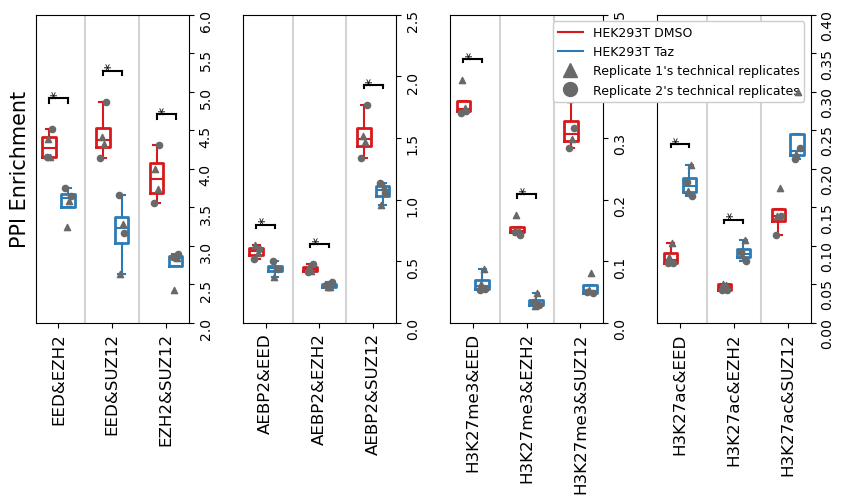

In [12]:


fig = GroupedPPIBoxPlot(TazDMSO_signals_normed, ["HEK293T DMSO", "HEK293T Taz"], [[0, 1, 2, 3], [4, 5, 6, 7]],
                  TazDMSO_pairnms, PPI_plot_groups,
                  plot_vmax = [6, 2.5, 0.5, 0.4], plot_vmin = [2, 0, 0, 0], plot_size = (10, 4))

# fig.savefig("TazDMSO_boxplot.svg", dpi = 1200)